In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

# Import the dataset 

In [2]:
df = pd.read_csv('titanic.csv', sep = '\t')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [5]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,156,156,156,31,155
unique,156,2,145,28,3
top,"Uruchurtu, Don. Manuel E",male,S.O.C. 14879,C23 C25 C27,S
freq,1,100,2,2,110


In [6]:
tm = df.groupby('Survived').mean()
tm

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,84.823529,2.490196,29.358824,0.666667,0.372549,27.271076
1,66.555556,2.296296,25.617805,0.518519,0.444444,29.693441


In [7]:
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v1-v2)/(v1+v2))

PassengerId    0.120677
Pclass         0.040510
Age            0.068047
SibSp          0.125000
Parch          0.088000
Fare           0.042524
dtype: float64

# Clean the data and rename the class values as 0/1 for model building (where 1 represents a malignant case). Also, let’s observe the distribution of the class.

In [8]:
df1 = df.drop(['Ticket','PassengerId'],axis = 1)

In [9]:
df1['Sex'].replace(['male','female'],[0,1], inplace = True)

In [10]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S


# visualization of dataset

In [11]:
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.116340,0.579062,-0.120416,-0.066943,0.039435,0.029343
Pclass,-0.116340,1.000000,0.038892,-0.362627,0.087420,0.016491,-0.607256
Sex,0.579062,0.038892,1.000000,-0.194657,0.184527,0.103897,0.006689
Age,-0.120416,-0.362627,-0.194657,1.000000,-0.393500,-0.215169,0.024494
SibSp,-0.066943,0.087420,0.184527,-0.393500,1.000000,0.399040,0.271997
Parch,0.039435,0.016491,0.103897,-0.215169,0.399040,1.000000,0.254822
Fare,0.029343,-0.607256,0.006689,0.024494,0.271997,0.254822,1.000000


[]

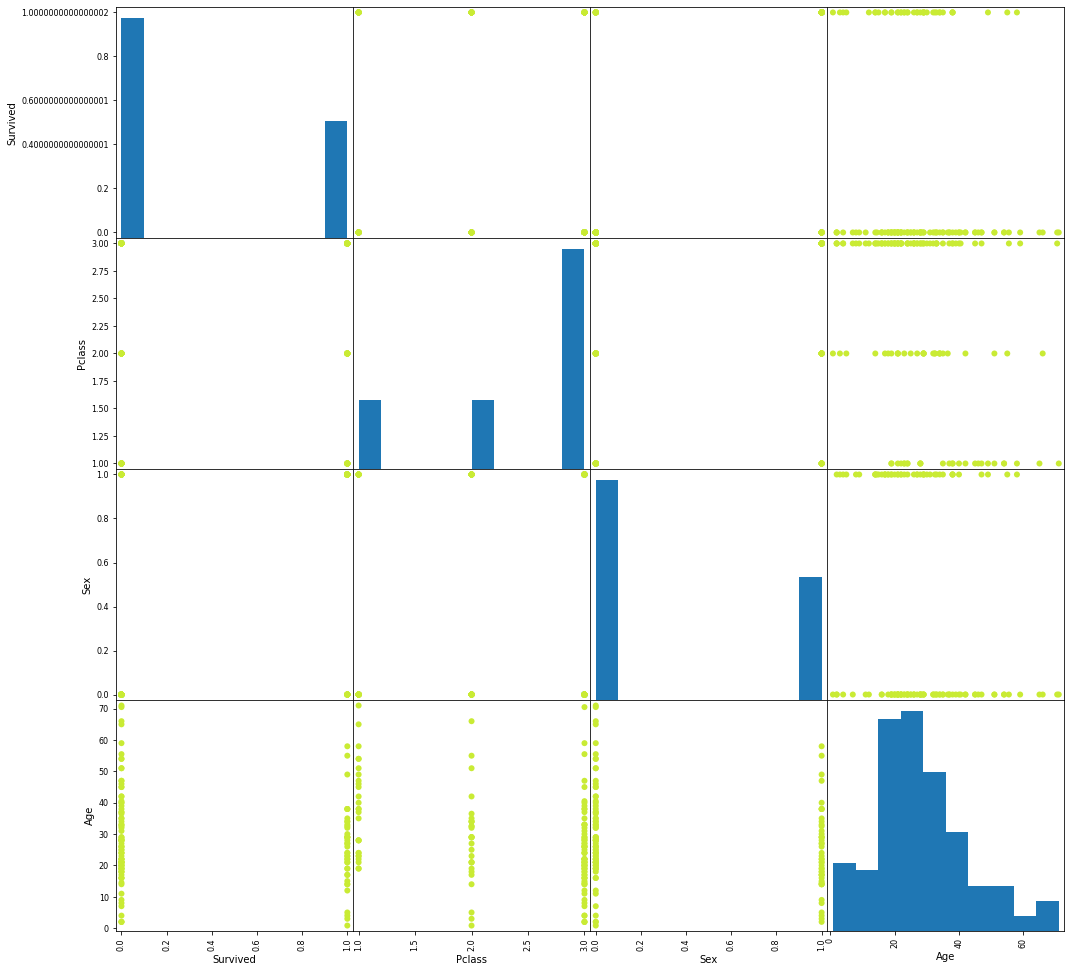

In [12]:
pd.plotting.scatter_matrix(df1.drop(['Fare','Parch','SibSp'],axis = 1),alpha = 1,marker = 'o',figsize = (17,17),color = '#c9eb34')
plt.plot()

In [13]:
df1['Cabin'] = df['Cabin'].isna()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
Survived    156 non-null int64
Pclass      156 non-null int64
Name        156 non-null object
Sex         156 non-null int64
Age         126 non-null float64
SibSp       156 non-null int64
Parch       156 non-null int64
Fare        156 non-null float64
Cabin       156 non-null bool
Embarked    155 non-null object
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 11.2+ KB


In [15]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,True,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,False,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,True,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,False,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,True,S


In [16]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'unknown'
def title_map(title):
    if title in ['Mr']:
        return 1
    elif title in ['Master']:
        return 3
    elif title in ['Ms','Mlle','Miss']:
        return 4
    elif title in ['Mme','Mrs']:
        return 5
    else :
        return 2
df1['title']  = df['Name'].apply(get_title).apply(title_map)
df1 = df1.drop(['Name'], axis = 1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,title
0,0,3,0,22.0,1,0,7.2500,True,S,1
1,1,1,1,38.0,1,0,71.2833,False,C,5
2,1,3,1,26.0,0,0,7.9250,True,S,4
3,1,1,1,35.0,1,0,53.1000,False,S,5
4,0,3,0,35.0,0,0,8.0500,True,S,1


In [17]:
df2 = pd.get_dummies(df1)

In [18]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,title,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,True,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,False,5,1,0,0
2,1,3,1,26.0,0,0,7.9250,True,4,0,0,1
3,1,1,1,35.0,1,0,53.1000,False,5,0,0,1
4,0,3,0,35.0,0,0,8.0500,True,1,0,0,1


In [19]:
mf = df1['Fare'].mean()
df2['Fare'] = df['Fare']>mf
print(df2.groupby('title').Age.mean())
df2['Age'][df['Age'].isna()] = df['Age'].mean()
x = df2.drop(['Survived'], axis = 1)
y = df2['Survived']
df2.info()

title
1    32.231884
2    44.333333
3     5.547143
4    18.964286
5    32.578947
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
Survived      156 non-null int64
Pclass        156 non-null int64
Sex           156 non-null int64
Age           156 non-null float64
SibSp         156 non-null int64
Parch         156 non-null int64
Fare          156 non-null bool
Cabin         156 non-null bool
title         156 non-null int64
Embarked_C    156 non-null uint8
Embarked_Q    156 non-null uint8
Embarked_S    156 non-null uint8
dtypes: bool(2), float64(1), int64(6), uint8(3)
memory usage: 9.4 KB


C:\Users\u\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [20]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

# let’s build a Logistic regression model 

In [21]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()


# Grid Search to maximize Recall

In [22]:
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(x_train,y_train)


C:\Users\u\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Sp

C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\u\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [23]:
grid_clf_acc.best_params_

{'C': 1, 'penalty': 'l2'}

In [24]:
y_pred_acc = grid_clf_acc.predict(x_test)

# Calculate the evaluation metrics of this model.

In [25]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.78125
Precision Score : 0.5714285714285714
Recall Score : 0.8888888888888888
F1 Score : 0.6956521739130435


# Confusion_Matrix - Logistic regression + gridsearch

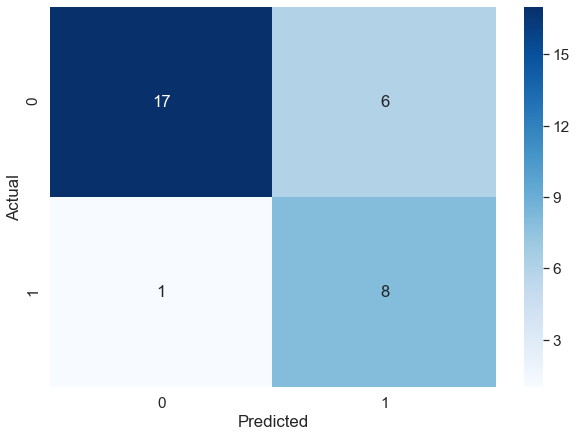

In [26]:
data = confusion_matrix(y_test, y_pred_acc)
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True)# font size